# BIOS512 Assignment #3

Import the 📈Tidyverse into your `R` session

In [65]:
library("tidyverse")

In this assignment we'll be using data from the [TidyTuesday Project](https://github.com/rfordatascience/tidytuesday). Specifically, we'll investigate vaccination rates at US schools. A `CSV` file of the data is located at:  

[https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv)

Get the "raw" data URL and import it into your `R` session using `read_csv`. Remember to capture the data under a variable name of your choosing!

In [66]:
measles = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/master/data/2020/2020-02-25/measles.csv')
          measles |> head()

Rows: 66113 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): state, year, name, type, city, county
dbl (8): index, enroll, mmr, overall, xmed, xper, lat, lng
lgl (2): district, xrel

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Arizona,2018-19,A J Mitchell Elementary,Public,Nogales,Santa Cruz,NA,51,100,-1,NA,NA,NA,31.34782,-110.9380
2,Arizona,2018-19,Academy Del Sol,Charter,Tucson,Pima,NA,22,100,-1,NA,NA,NA,32.22192,-110.8961
3,Arizona,2018-19,Academy Del Sol - Hope,Charter,Tucson,Pima,NA,85,100,-1,NA,NA,NA,32.13049,-111.1170
4,Arizona,2018-19,Academy Of Mathematics And Science South,Charter,Phoenix,Maricopa,NA,60,100,-1,NA,NA,NA,33.48545,-112.1306
5,Arizona,2018-19,Acclaim Academy,Charter,Phoenix,Maricopa,NA,43,100,-1,NA,2.33,2.33,33.49562,-112.2247
6,Arizona,2018-19,Alfred F Garcia,Public,Phoenix,Maricopa,NA,36,100,-1,NA,NA,NA,33.43532,-112.1168


In [67]:
measles = read_csv(
'https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/master/data/2020/2020-02-25/measles.csv',
          show_col_types = FALSE
    )
          measles |> head()

index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Arizona,2018-19,A J Mitchell Elementary,Public,Nogales,Santa Cruz,NA,51,100,-1,NA,NA,NA,31.34782,-110.9380
2,Arizona,2018-19,Academy Del Sol,Charter,Tucson,Pima,NA,22,100,-1,NA,NA,NA,32.22192,-110.8961
3,Arizona,2018-19,Academy Del Sol - Hope,Charter,Tucson,Pima,NA,85,100,-1,NA,NA,NA,32.13049,-111.1170
4,Arizona,2018-19,Academy Of Mathematics And Science South,Charter,Phoenix,Maricopa,NA,60,100,-1,NA,NA,NA,33.48545,-112.1306
5,Arizona,2018-19,Acclaim Academy,Charter,Phoenix,Maricopa,NA,43,100,-1,NA,2.33,2.33,33.49562,-112.2247
6,Arizona,2018-19,Alfred F Garcia,Public,Phoenix,Maricopa,NA,36,100,-1,NA,NA,NA,33.43532,-112.1168


The `mmr` column has holds 🤒 measles, mumps, rubella 🤒 vaccination rates for students in each respective school. **If the `mmr` value is not available for a school the `mmr` value is set to -1 in this data set.** 

The target `mmr` vaccination rate as [recommended by the CDC](https://www.cdc.gov/mmwr/preview/mmwrhtml/mm5632a3.htm) for schools is 95%. 

**Calculate the fraction of schools per state that have vaccination rates greater than the CDC 95%. Capture the output as a table called `df_vacc_rates`.**

You'll need to do use `filter`, `group_by`, and `summarize`. 

I.e.
1. Filter out schools that don't report `mmr` vaccination rate (keep schools where `mmr >= 0`).
1. Group the data by `state`.
1. Summarize fracion of vaccination rates above 95%.

💡Remember `n()` stands for the number or records in a group. Also, `sum(mmr >= 95, na.rm=TRUE)` will count the number of values above or equal to 95.💡

In [68]:
# create the df_vacc_rates here
df_vacc_rates = measles |> filter(mmr >= 0) |>
  group_by(state) |>
    summarize(fraction_above_95 = sum(mmr >= 95, na.rm = TRUE) /n())



In [69]:
df_vacc_rates |> head()

state,fraction_above_95
<chr>,<dbl>
Arizona,0.506404782
Arkansas,0.003527337
California,0.888506151
Colorado,0.623092236
Connecticut,0.811544992
Illinois,0.896825397


Which state (of those that report `mmr`) has the smallest fraction of schools above the CDC target vaccination rate of 95%?  

In [70]:
df_vacc_rates|>
  #filter(mmr >= 0) |>
  #group_by(state) |>
  #summarize(fraction_above_95 = sum(mmr >= 95, na.rm = TRUE) /n())
  filter(fraction_above_95 == min(fraction_above_95, na.rm = TRUE))


state,fraction_above_95
<chr>,<dbl>
Arkansas,0.003527337


**Make a ECDF plot of the school vaccination rates in North Carolina.** Use the `overall` column which reports the "overall" vaccination rate at each school.

❗️Remember, you can calculate the `y` value for ECDF charts using `mutate`, and `cume_dist`.

In [71]:
library(ggrepel)


In [72]:
library(scales)

In [73]:
nc_vacc_data = measles %>%
    arrange(overall) %>%
    filter(state == "North Carolina") %>%
   mutate(cumulative_dist = cume_dist(overall))

nc_vacc_data |> head()

index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng,cumulative_dist
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1767,North Carolina,2018-19,Renaissance Montessori Sch. of Cary,NA,NA,Wake,NA,4,-1,-1.0,NA,NA,NA,35.76823,-78.74369,0.0004796163
1766,North Carolina,2018-19,Annunciation Catholic,NA,NA,Craven,NA,23,-1,21.7,NA,NA,NA,34.87682,-76.90448,0.0009592326
1765,North Carolina,2018-19,Starmount Acad of Excellence,NA,NA,Mecklenburg,NA,77,-1,40.3,NA,NA,NA,35.13929,-80.87051,0.0014388489
1764,North Carolina,2018-19,Spruce Pine Montessori,NA,NA,Mitchell,NA,7,-1,42.9,NA,NA,NA,35.91674,-82.06719,0.0019184652
1763,North Carolina,2018-19,Moyock Elementary,NA,NA,Currituck,NA,85,-1,43.5,NA,NA,NA,36.52490,-76.17366,0.0023980815
1762,North Carolina,2018-19,Liberty Christian,NA,NA,Durham,NA,20,-1,45.0,NA,5,NA,36.06362,-78.92544,0.0028776978


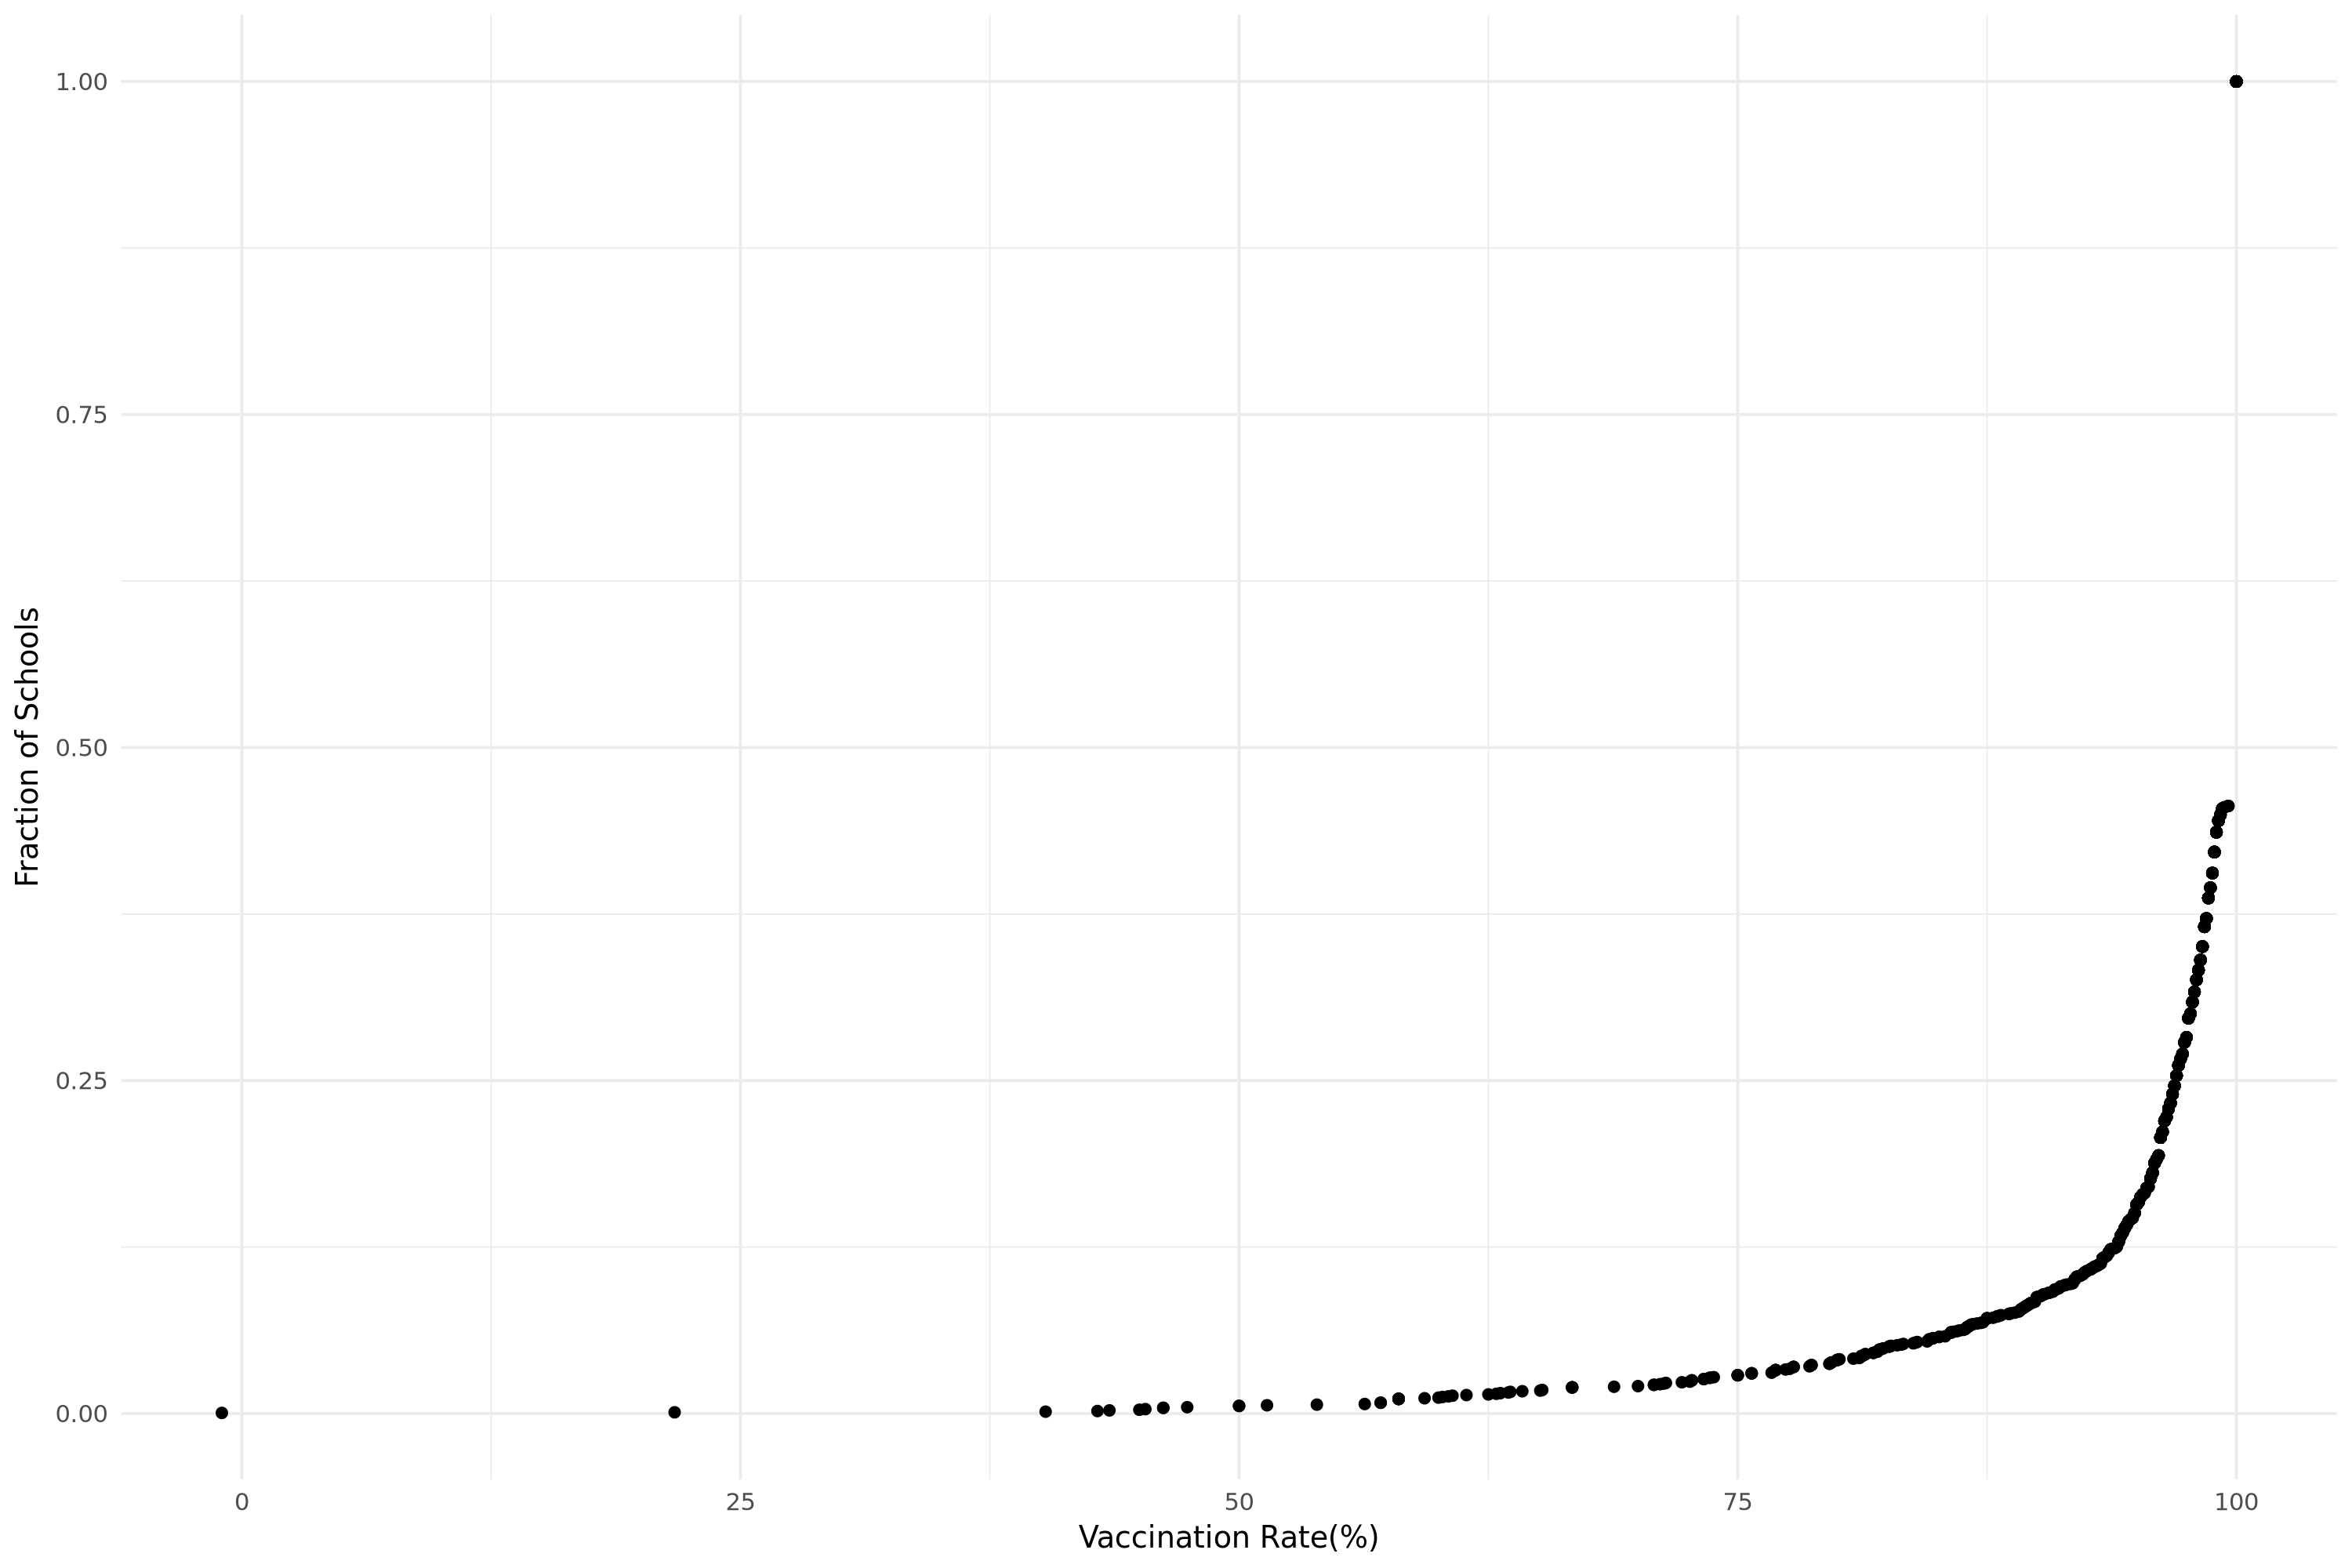

In [74]:
ggplot(nc_vacc_data,aes(x = overall, y = cumulative_dist)) + 
   geom_point() +
   labs( x = 'Vaccination Rate(%)', y = 'Fraction of Schools') +
   theme_minimal()

Warning message:
“ggrepel: 2085 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


NULL

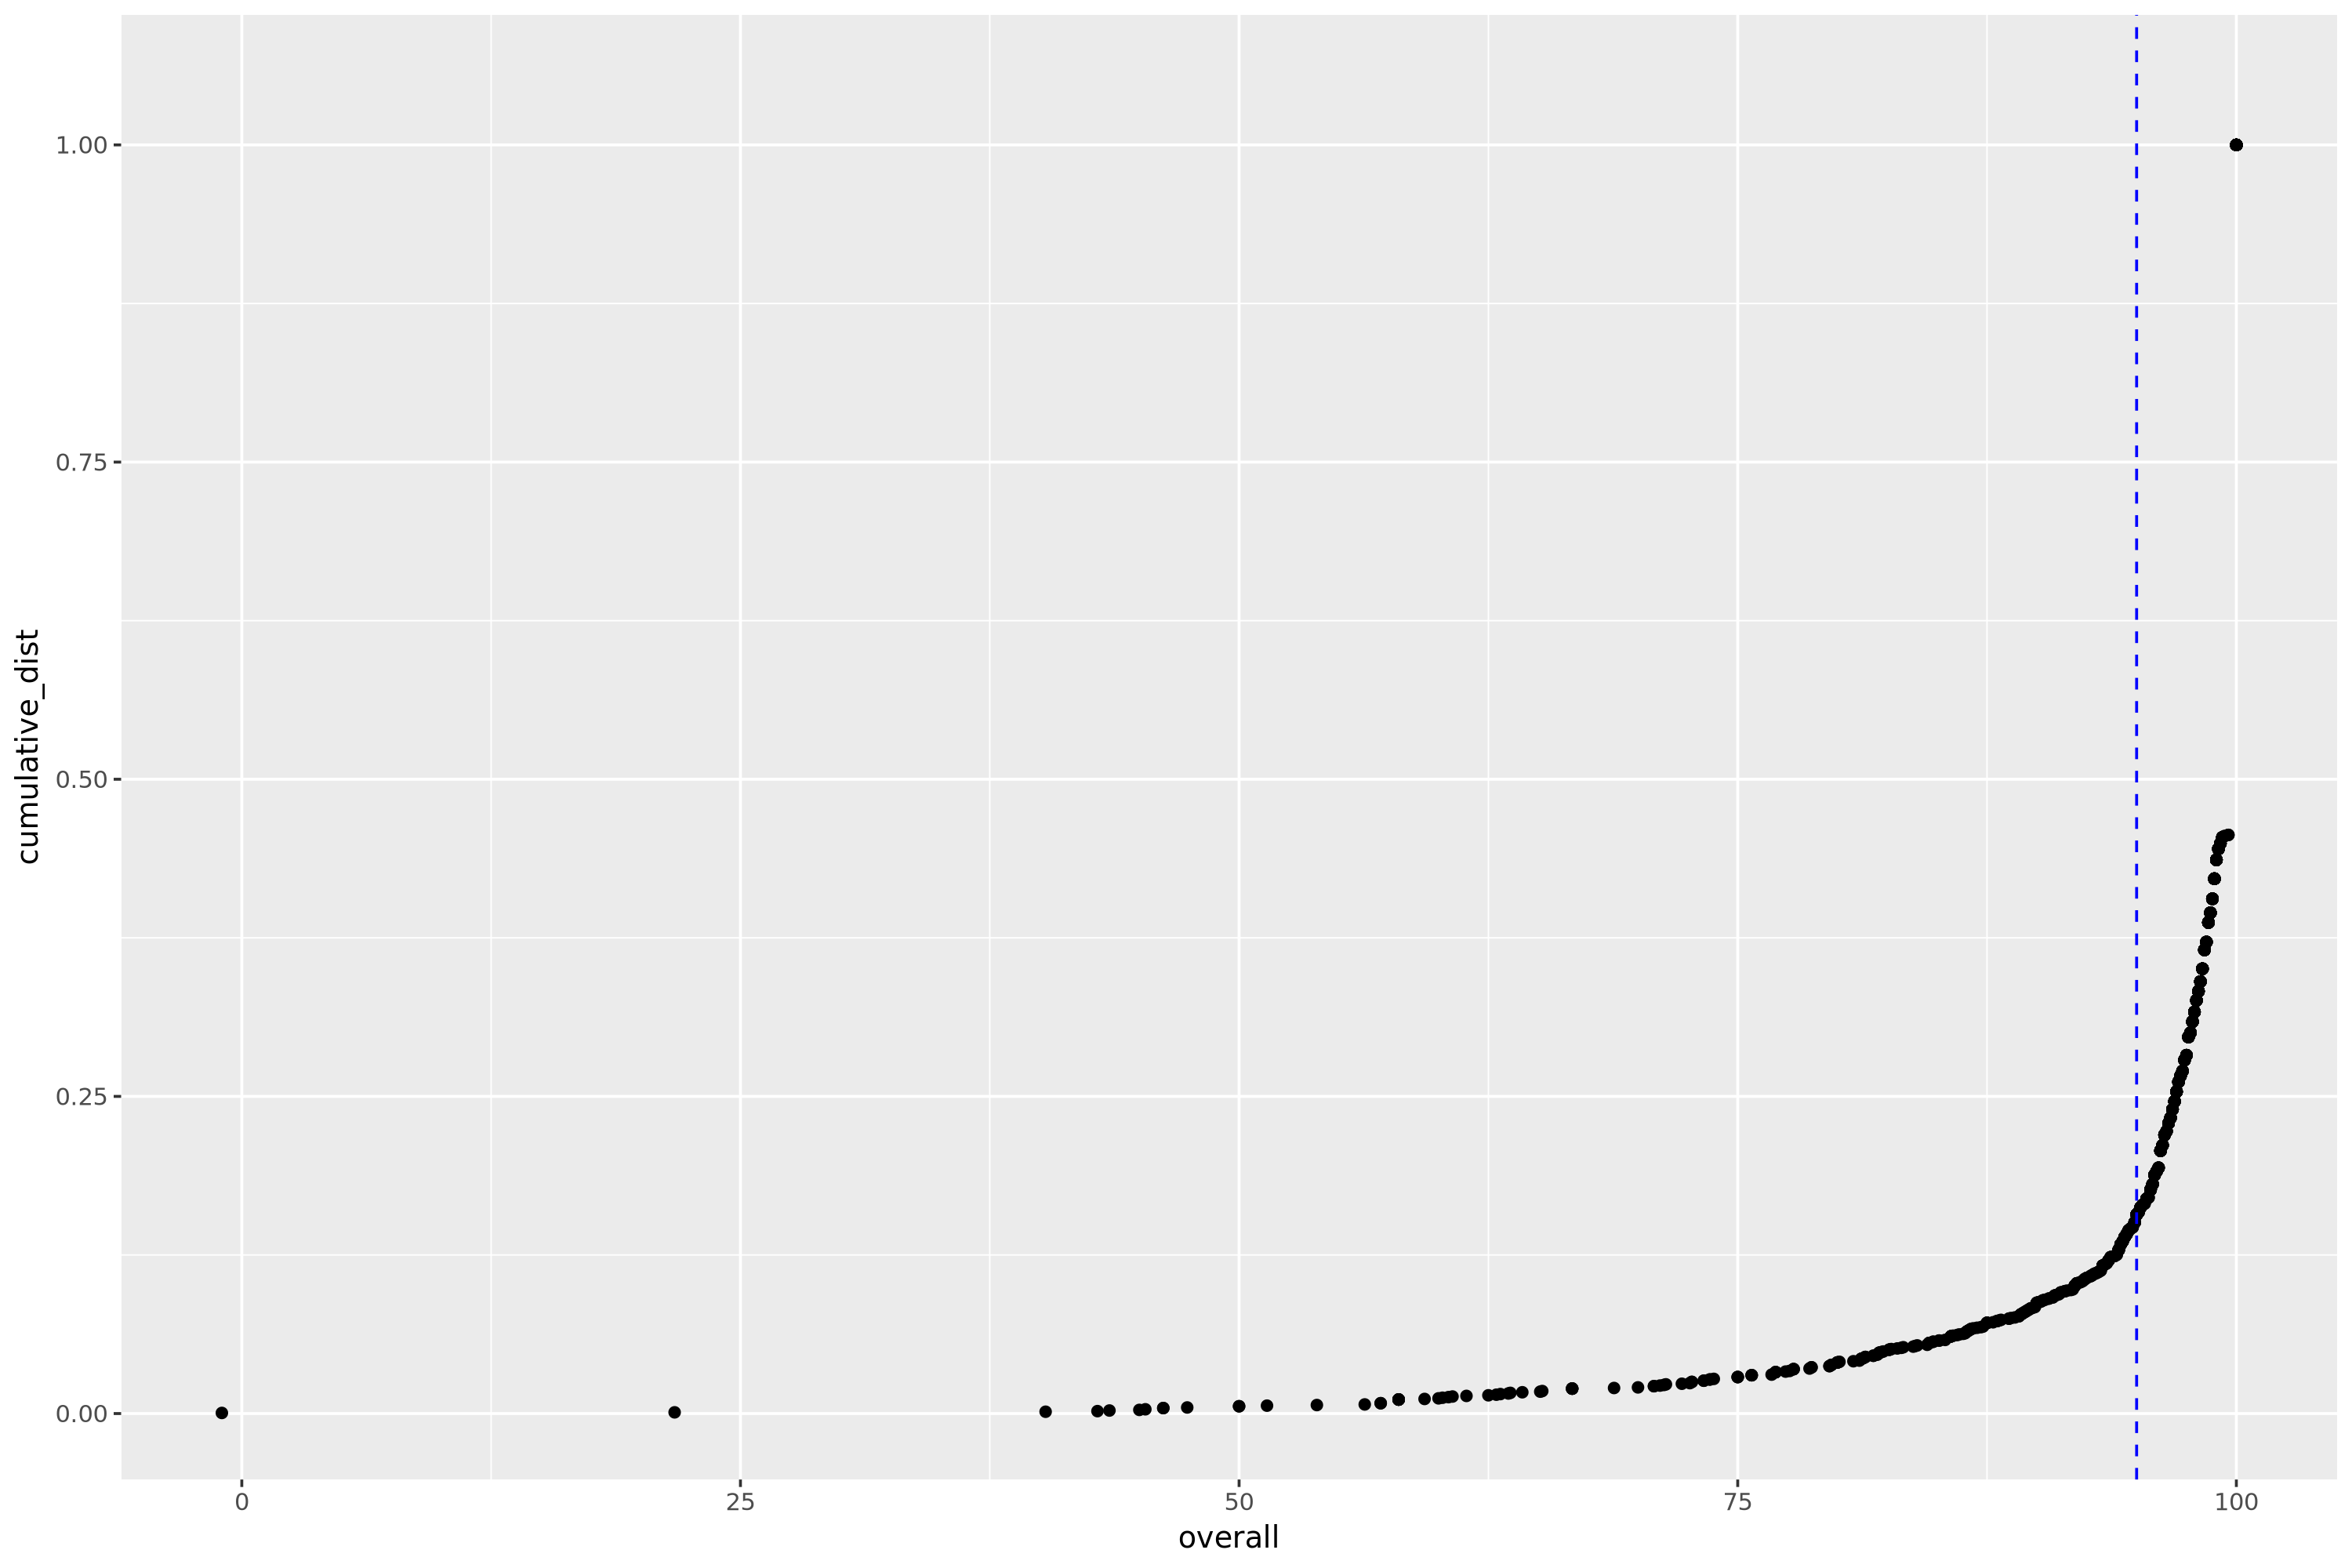

In [75]:
ggplot(nc_vacc_data,aes(x = overall, y = cumulative_dist)) + 
   geom_point() +
   geom_vline(xintercept = 95, linetype = "dashed", color = "blue") +
   geom_text_repel(aes(x= 95, label = ("CDC Recommended Vaccination rate(95%)")), nudge_y = 0.05)
   labs( x = 'Vaccination Rate(%)', y = 'Fraction of Schools') +
   theme_minimal()

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 6)
ggplot(nc_vacc_data,aes(x = overall, y = cumulative_dist)) + 
   geom_point() +
   geom_step() +
   geom_vline(xintercept = 95, linetype = "dashed", color = "blue") +
   geom_text_repel(aes(x= 95, label = ("CDC Recommended Vaccination rate(95%)")), nudge_y = 0.05)
   labs( x = 'Vaccination Rate(%)', y = 'Fraction of Schools') +
   theme_minimal()

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 8)

ggplot(nc_vacc_data, aes(x = overall, y = cumulative_dist)) + 
  geom_point() +
  geom_step() +
  geom_vline(xintercept = 95, linetype = "dashed", color = "blue") +
  geom_text_repel(
    aes(x = 95, y = 0.5, label = "CDC Recommended Vaccination rate (95%)"),
    nudge_y = 0.05,
    direction = "y",
    segment.color = NA
  ) +
  labs(x = 'Vaccination Rate(%)', y = 'Fraction of Schools') +
  theme_minimal()

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_step()`).”


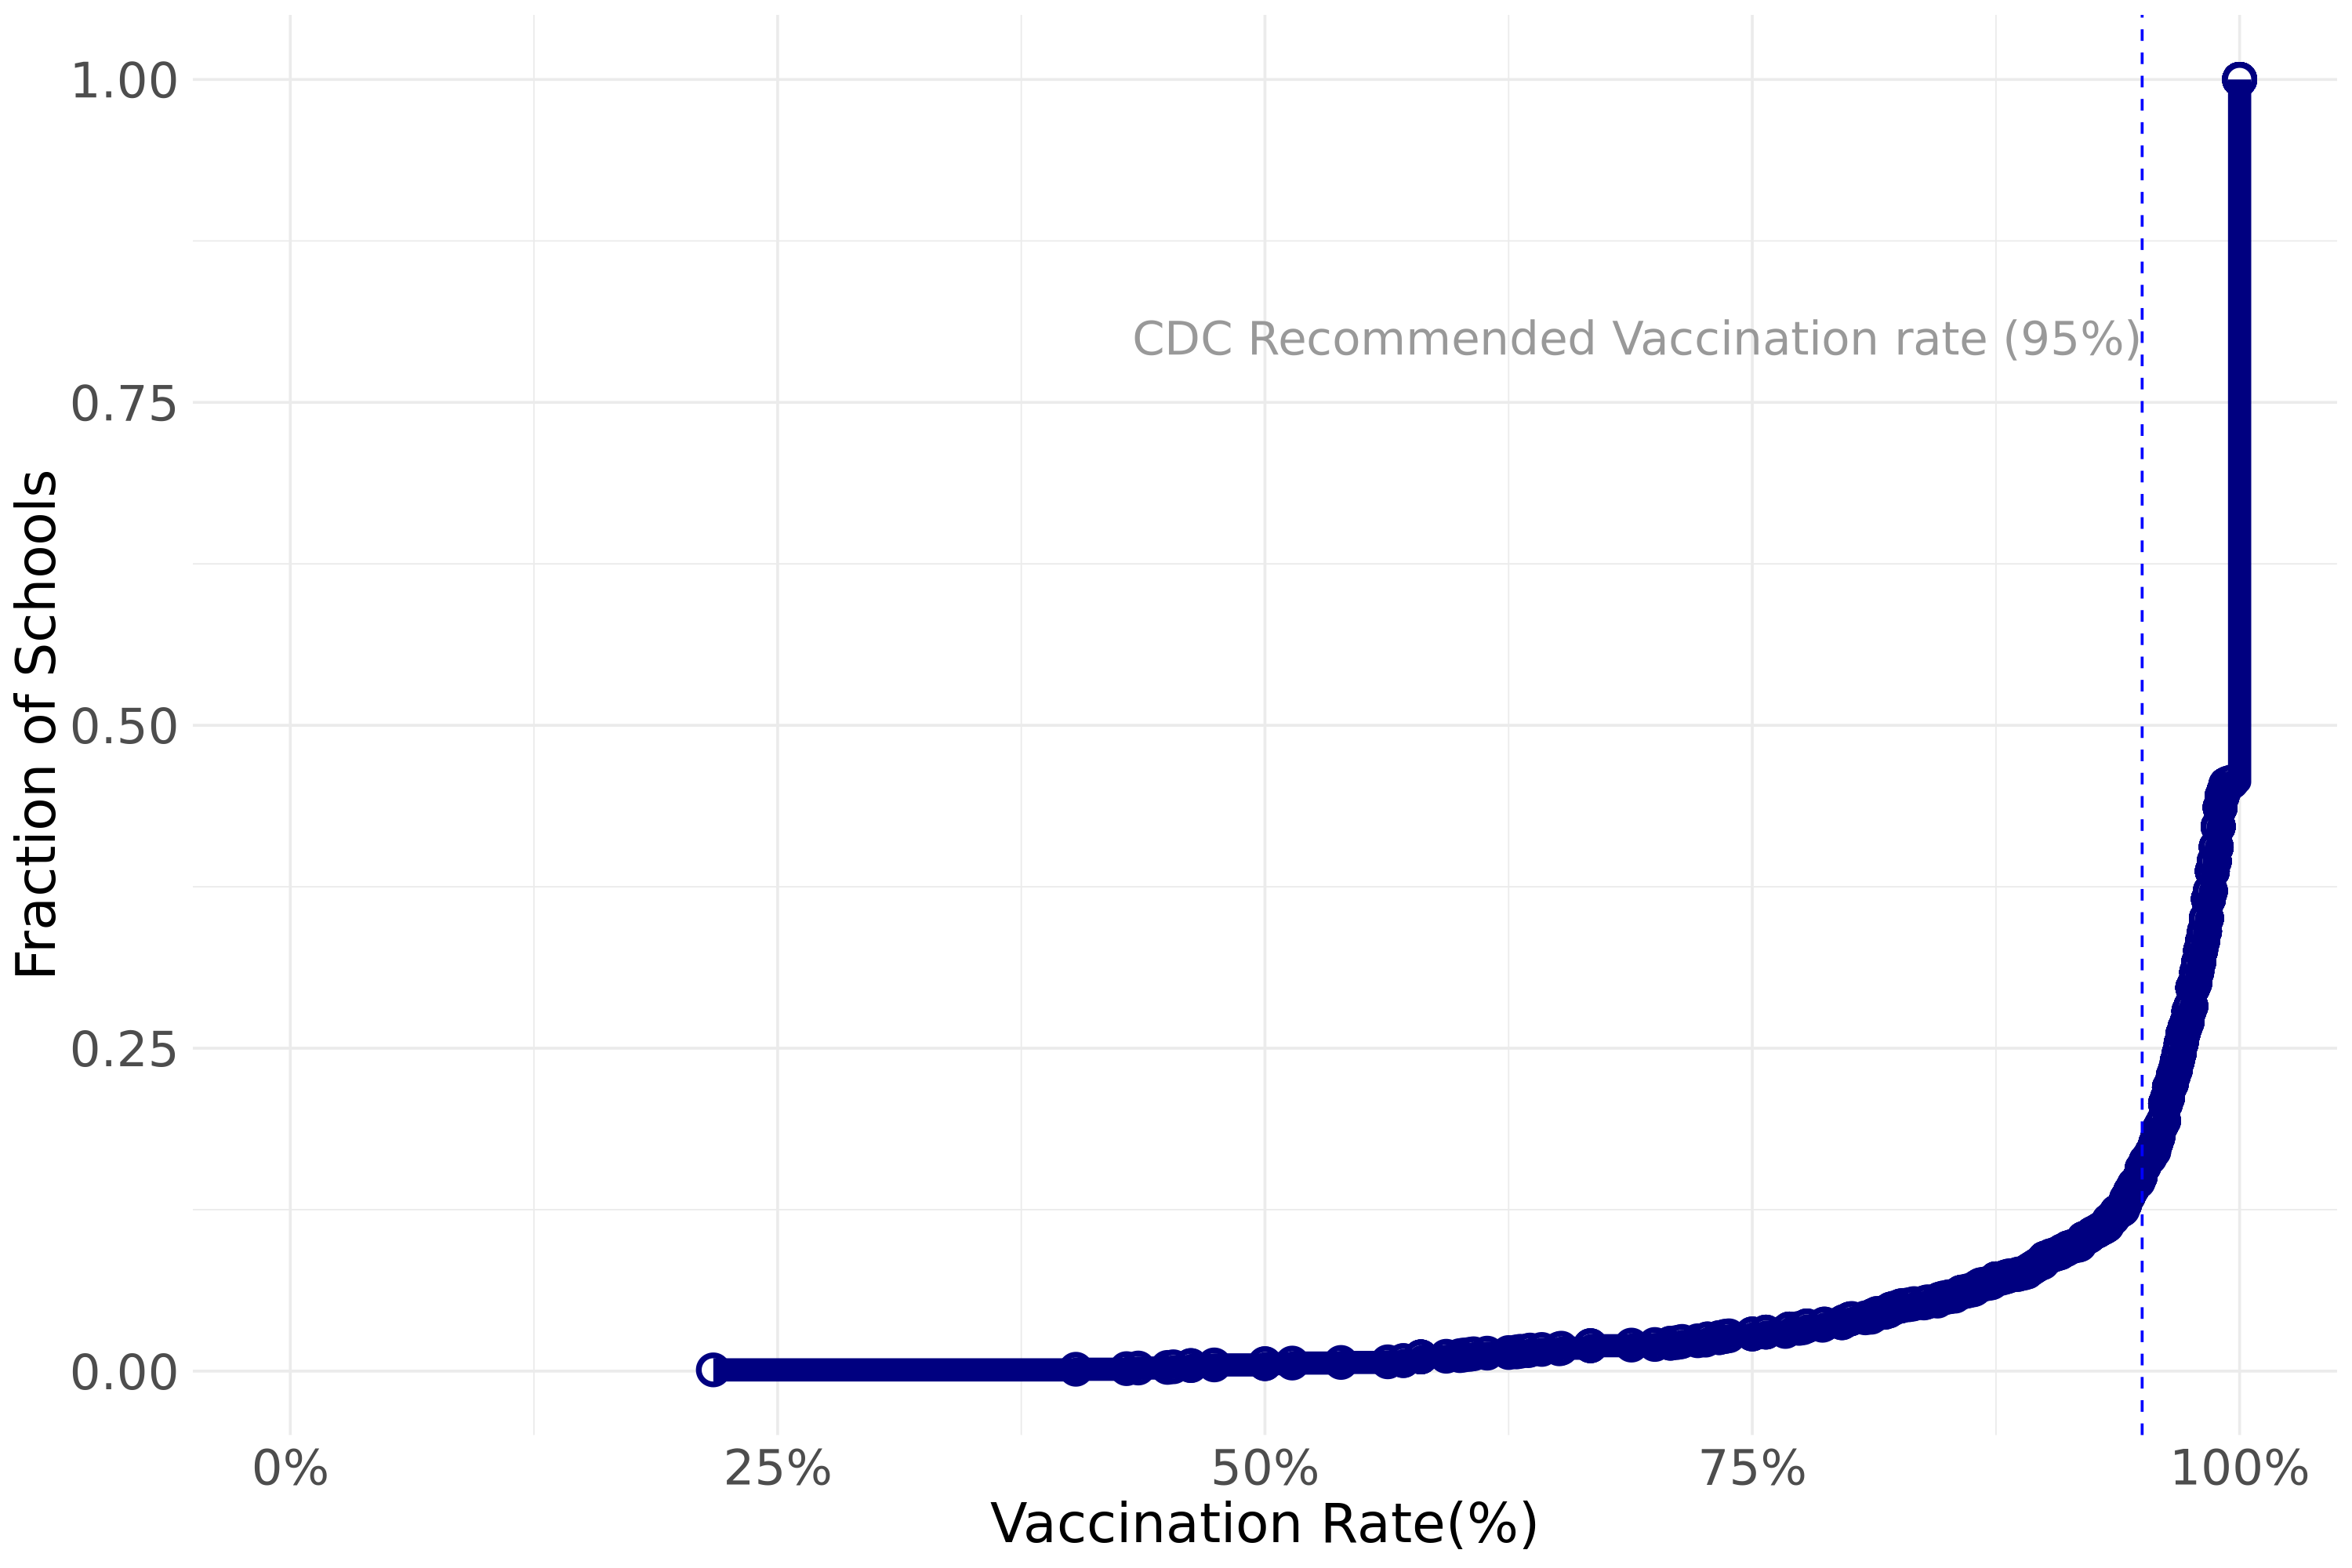

In [105]:
options(repr.plot.width = 12, repr.plot.height = 8)

ggplot(nc_vacc_data, aes(x = overall, y = cumulative_dist)) + 
  geom_point(size = 4, shape = 21, color = "navy blue", fill = "white", stroke = 1.5) +
  geom_step(linewidth = 4, color = "navy blue") +
  geom_vline(xintercept = 95, linetype = "dashed", color = "blue") +
  annotate("text", x = 95, y = 0.8, label = "CDC Recommended Vaccination rate (95%)", 
           color = "grey60", size = 6, hjust = 1) +
   scale_x_continuous(limits = c(0, 100),
                     labels = percent_format(scale = 1)
  ) +
  labs(x = 'Vaccination Rate(%)', y = 'Fraction of Schools') +
  theme_minimal()+
  theme(axis.title.x = element_text(size = 20),
        axis.title.y = element_text(size = 20),
        axis.text.x = element_text(size = 18),
        axis.text.y = element_text(size = 18)
)

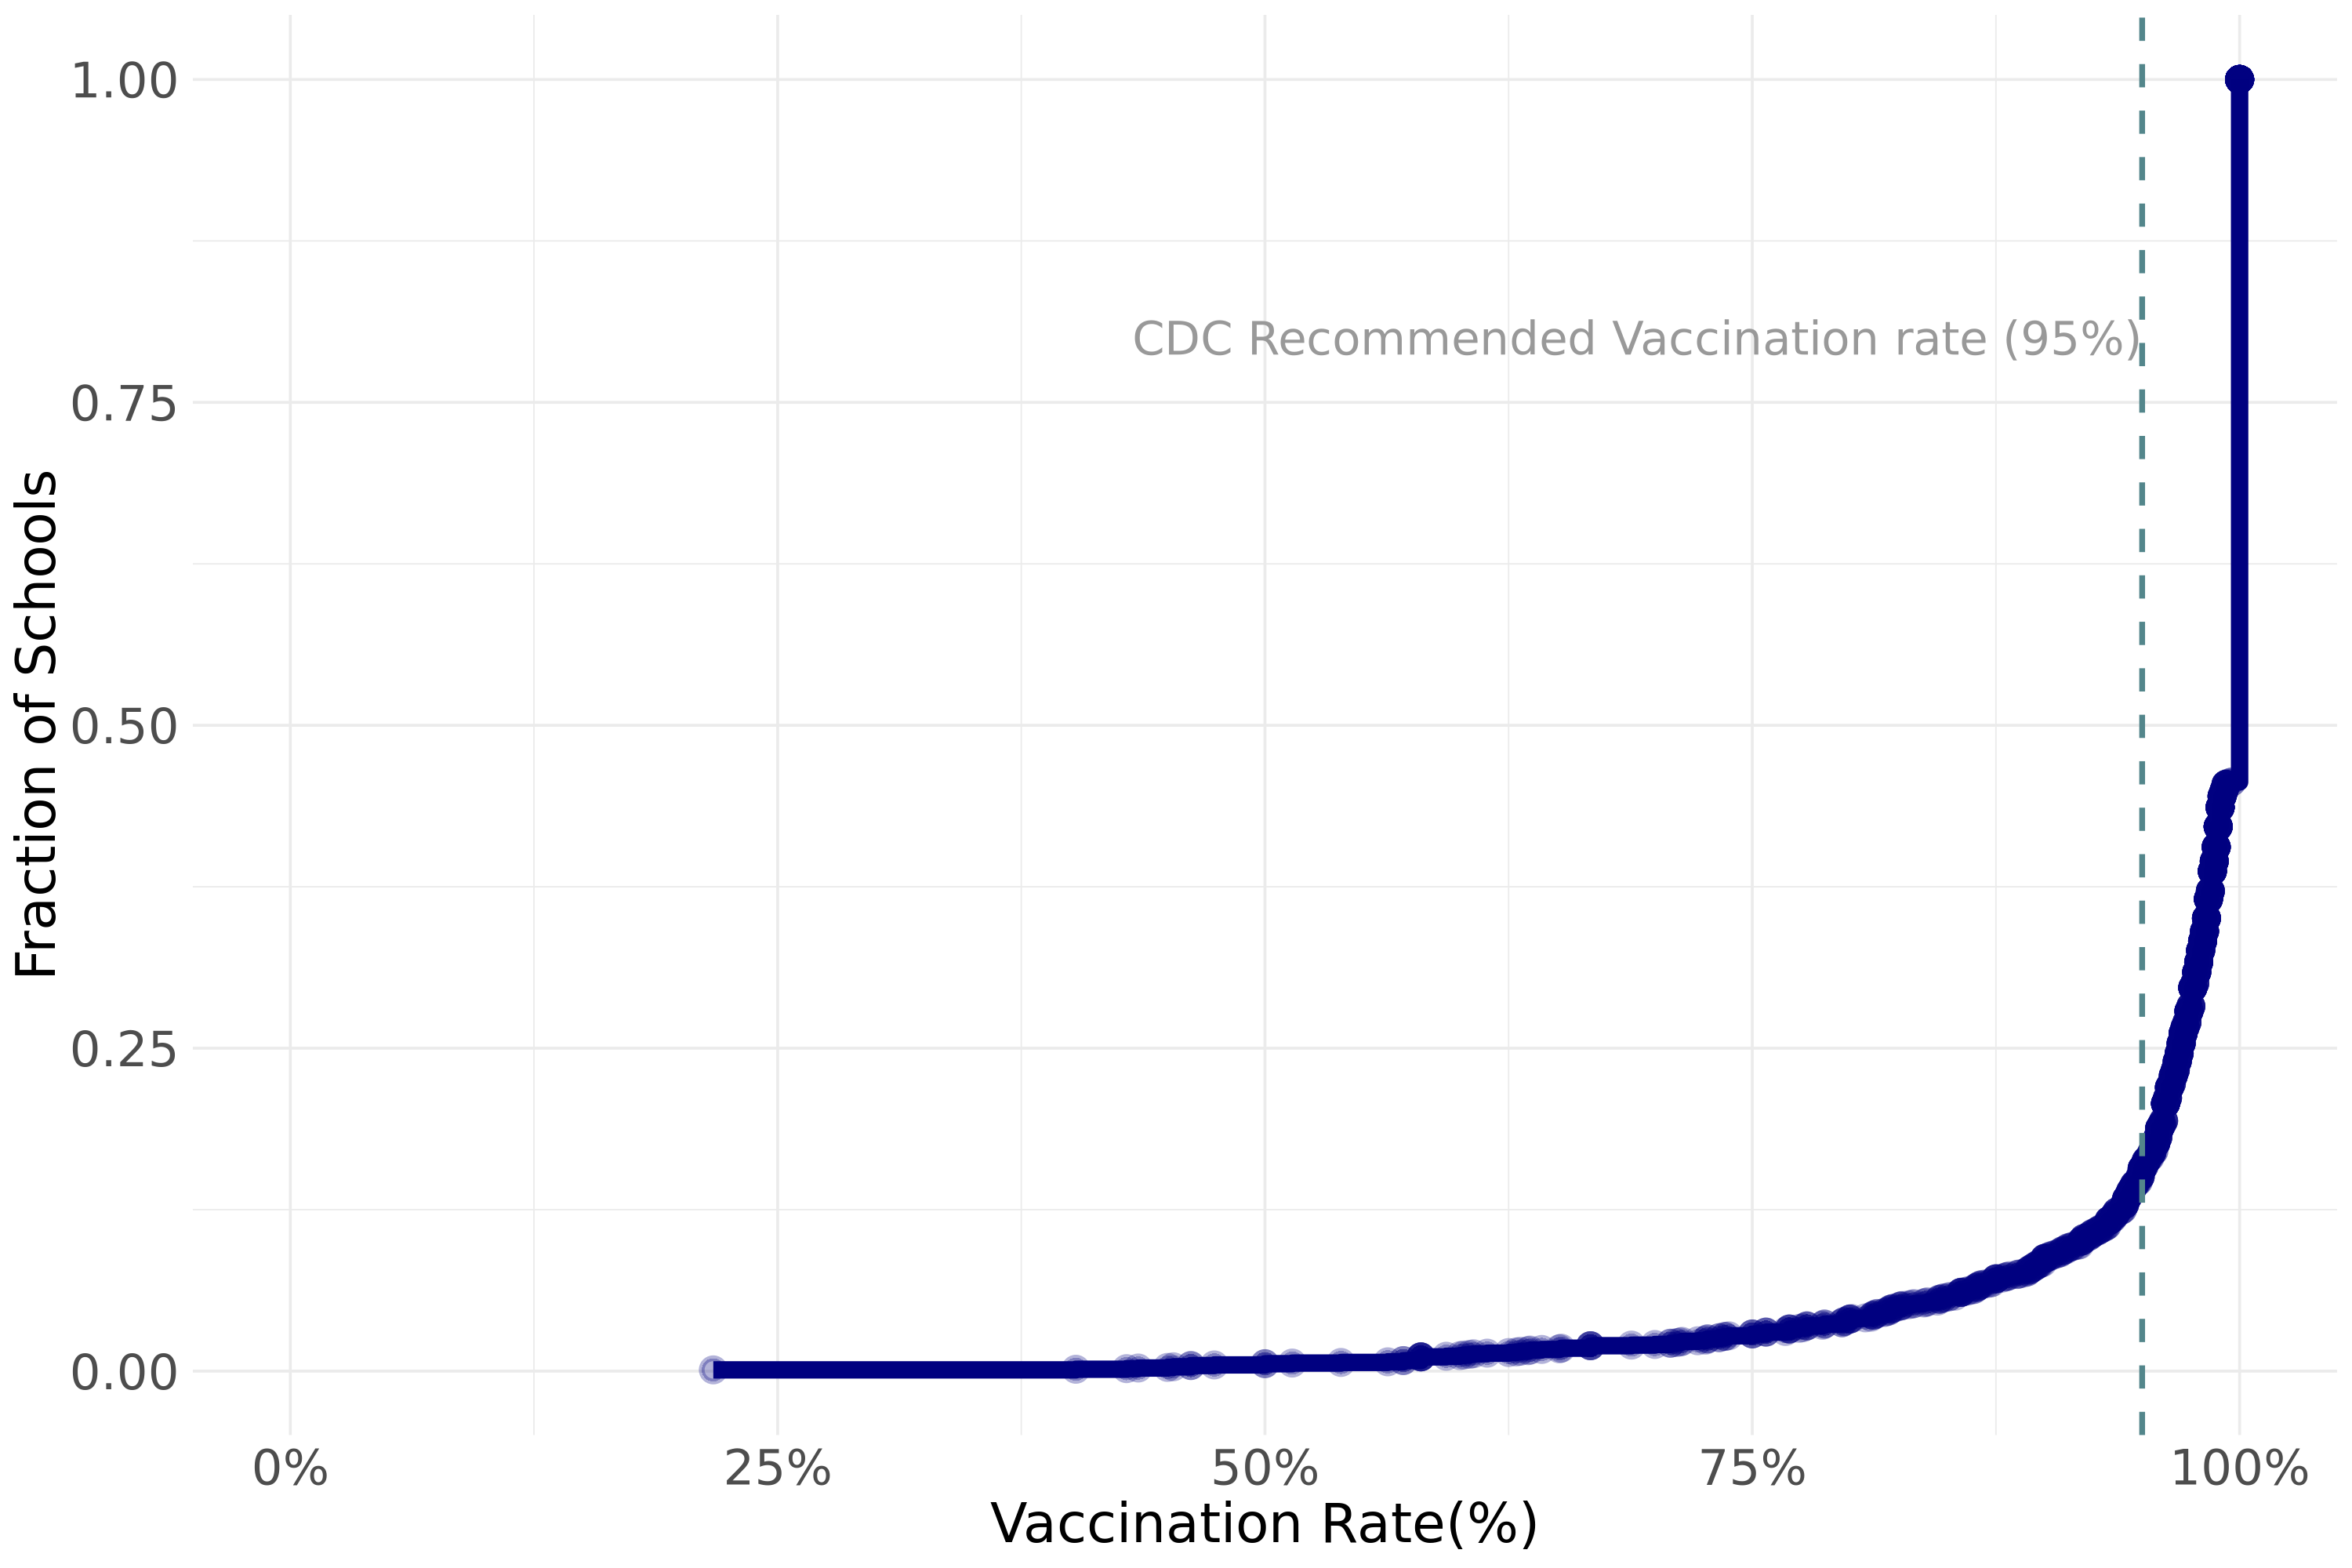

In [103]:
options(repr.plot.width = 12, repr.plot.height = 8)

ggplot(nc_vacc_data, aes(x = overall, y = cumulative_dist)) + 
  geom_point(size = 3, color = "navy blue", fill = "white", alpha = 0.3, stroke = 1.5, na.rm = TRUE) +
  geom_step(linewidth = 3, color = "navy blue", na.rm = TRUE) +
  geom_vline(xintercept = 95, linetype = "dashed", color = "cadetblue4", linewidth = 1) +
  annotate("text", x = 95, y = 0.8, label = "CDC Recommended Vaccination rate (95%)", 
           color = "grey60", size = 6, hjust = 1) +
   scale_x_continuous(limits = c(0, 100),
                     labels = percent_format(scale = 1)
  ) +
  labs(x = 'Vaccination Rate(%)', y = 'Fraction of Schools') +
  theme_minimal()+
  theme(axis.title.x = element_text(size = 20),
        axis.title.y = element_text(size = 20),
        axis.text.x = element_text(size = 18),
        axis.text.y = element_text(size = 18)
)

(My solution is below if you want to peek 👀. Uncomment the code, change the cell to `markdown`, and exectute it. I used `geom_text_repel` from [ggrepel](https://cran.r-project.org/web/packages/ggrepel/vignettes/ggrepel.html) fo the annotation.)

![](https://github.com/chuckpr/BIOS512/blob/main/assignments/2023/measles-chart.png?raw=true)

Is the median vaccination rate for NC schools above the CDC recommended target?

In [ ]:
summary(nc_vacc_data$overall)

Yes,the median vaccination rate for NC schools is above the CDC recommended target